# K Nearest Neighbors (k-NN)  

[Lecture video](https://youtu.be/ygUY9b8a1hE)  

In [1]:
# necessary imports
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

## Distance computation  

We will first implement distance computation between two examples:

In [2]:
def EuclideanDistance(x1,x2):
    dist = np.sum((x1-x2)**2, axis=1)
    return dist

def ManhattanDistance(x1,x2):
    np.sum(np.abs(x1-x2), axis=1)
    return dist

In the next two sections, we will implement classification and regression with k-NN.  

## KNN implementation  
Let's implement KNN class.

In [16]:
# for computing mode for classification task
class KNN:
    def __init__(self, distance_metric="EuclideanDistance", task_type="Classification"):
        # set k to desired value,
        # i.e. how many neighbors shoulb be allowed to participate in prediction.
        self._k = k
        self._distance_metric = distance_metric
        self._task_type = task_type

    def fit(self, X, y):
        # fitting model on data only requires copying the data
        self._X = X
        self._y = y

    def predict(self, newExample):
        # 2. calculate the distance between the new example and every example from the data. Thus create a distance vector.
        distance_vector = self._distance_metric(self._X, newExample)

        # 3. Get indices of nearest k neighbors
        k_nearest_neighbours_indices = np.argpartition(distance_vector, self.k)[:self._k]

        # 4. Get the labels of the selected k entries 
        k_nearest_neighbours = self._y[k_nearest_neighbours_indices]

        # 6. If it is classification task, return the majority class by computing mode of teh ***k*** labels
        if self._task_type == 'Classification':
            label = stats.mode(k_nearest_neighbours)[0]

        # If the task is a regression task, then we would return the average of labels of nearest neighnours
        else:
            label = k_nearest_neighbours.mean()

        return label, k_nearest_neighbours_indices

    def eval(self, X_test, y_test):
        '''Returns misclassification report or
        Root mean squared error'''
        if self._task_type == 'Classification':
            y_predicted = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_predicted[i], _ = self.predict(X_test[i, :])
            error = np.mean(y_test==y_predicted, axis=0)        # Misclassification error is implemented here

        else:
            y_predicted = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_predicted[i], _ = self.predict(X_test[i,:])
            error_vector = y_predicted - y_test
            error = np.sqrt((error_vector.T @ error_vector) / error_vector.ravel().shape[0])       # Squared error is implemented here.

        return error

## Classification  

### Example 1: Simple decision boundary.  

Let's generate 100 points, each represented with two features and a class label. This dataset is generated for classification task.  
> The points are generated such that they are clustered in two groups with means [0, 0] and [5, 5] with standard deviation of 1.

In [6]:
# generate artificial data points
X, y = make_blobs(n_samples=100, n_features=2, centers=[[0,0],[5,5]], cluster_std=1, random_state=12)

Let's check shapes of feature matrix and label vector.

In [7]:
print(f"Shape of feature matrix: {X.shape}")
print(f"Shape of label vector: {y.shape}")

Shape of feature matrix: (100, 2)
Shape of label vector: (100,)


We visualize these points:  
[Lecture video for visualization code](https://youtu.be/ygUY9b8a1hE?t=412)  

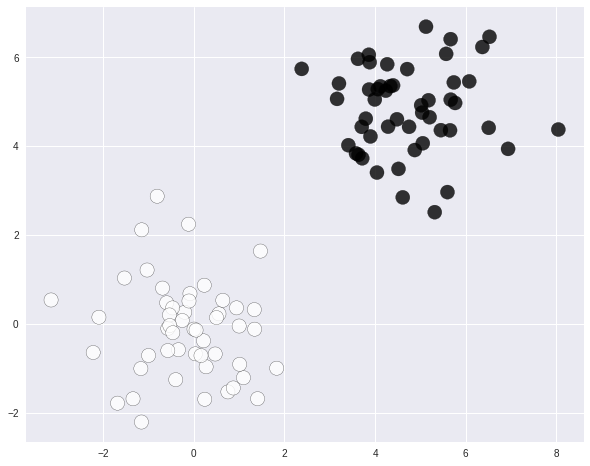

In [8]:
# plot the two classes
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200, edgecolor='k', alpha=0.8)
plt.show()

Let's apply KNN technique and visualize how a new example is assigned a label. For this example, value of k is set to be 3.  

## IMPORTANT  
The following code block doesnt work properly.  

[video link](https://youtu.be/ygUY9b8a1hE?t=430)

In [18]:
newExample = np.array([2.2, 2.2])

# initialize a model with k=3 and Euclidean distance as distance metric 
model = KNN(3,distance_metric=EuclideanDistance)

model.fit(X, y)

# get the predicted label and indices of nearest k neighbours
prediction, nearest_neighbours_indices=model.predict(newExample.reshape(1,2))

TypeError: __init__() got multiple values for argument 'distance_metric'

Let's visualize the new examples along with training examples.  
[video link for data visualization code](https://youtu.be/ygUY9b8a1hE?t=513)  

### Decision boundary  
Data visualization code

[video link](https://youtu.be/ygUY9b8a1hE?t=513)

### Example 2: Complex decision boundary.  

Following is an example of binary class dataset of two spirals. As it is clear that KNN leads to very smooth and equidistant decision boundary.  

In [19]:
def maketwospirals(num_points=1000, rotations=2, noise=0.5):
    n = np.sqrt(np.random.rand(num_points, 1)) * rotations * (2*np.pi)
    rx = -np.cos(n)*n + np.random.rand(num_points, 1) * noise
    ry = np.sin(n)*n + np.random.rand(num_points, 1) * noise

    return (np.concatenate((np.hstack((rx,ry)), np.hstack((-rx, -ry))), axis=0),
            np.concatenate((np.zeros(num_points), np.ones(num_points)), axis=0))

X_spiral, y_spiral = maketwospirals()

In [ ]:
plt.figure(figsize=(8,8))
model = KNN(3)
model.fit(X_spiral, y_spiral)
# "draw_decision_boundary" function is to be seen from video at 9:31.  

## Regression  

In [21]:
# to make this notebook's output stable across runs
np.random.seed(42)

# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following parameters  
w1=3
w0=4
n = 100

X = 2 * np.random.rand(n,)

# obtain y = 4 _ 3*x + noise. Noise is randomly samples.  
y = w0 + w1 * X + np.random.random(n,)

In [24]:
X=X.reshape(-1, 1)
y=y.reshape(-1, 1)

In [25]:
print(f"Shape of the training data feature matrix: {X.shape}")
print(f"Shape of the label vector: {y.shape}")

Shape of the training data feature matrix: (100, 1)
Shape of the label vector: (100, 1)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
print(f"Shape of the training feature matrix: {X_train.shape}")
print(f"Shape of the training label vector: {y_train.shape}")

print(f"Shape of the test feature matrix: {X_test.shape}")
print(f"Shape of the test label vector: {y_test.shape}")

Shape of the training feature matrix: (80, 1)
Shape of the training label vector: (80, 1)
Shape of the test feature matrix: (20, 1)
Shape of the test label vector: (20, 1)


Data viualization for this data

[video link](https://youtu.be/ygUY9b8a1hE?t=684)